### Analysis_of_African_Conflict_Dataset_(1997_to_2020)

This analysis focuses on the African Conflict Dataset from 1997 to 2020. The dataset, obtained from [Kaggle](https://www.kaggle.com/datasets/lumierebatalong/africa-conflict-19972020?rvi=1), contains information on various variables such as event ID, event date, event type, actors involved, location, latitude, longitude, and fatalities. The dataset has missing values in some columns, such as `admin3`, associated actors and event notes.

The analysis includes visualizations of the distribution of conflicts over time, the number of fatalities by region, and the types of events. Additionally, a heatmap is created to visualize the concentration of events in different regions. The analysis also includes a word cloud analysis of the event notes to identify common themes.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from IPython.display import IFrame
import folium
from folium import plugins
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/content/conflicts_africa_1997-2020.csv')
df.head()

,ISO,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [3]:
# Number of rows and columns
df.shape

(65535, 29)

The dataset has 65,535 rows and 29 columns. This means that the dataset contains information for 65,535 individual observations, with each observation having 29 different variables associated with it.

In [4]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   event_id_cnty     65535 non-null  object
 2   event_id_no_cnty  65535 non-null  int64 
 3   event_date        65535 non-null  object
 4   year              65535 non-null  int64 
 5   time_precision    65535 non-null  int64 
 6   event_type        65535 non-null  object
 7   sub_event_type    65535 non-null  object
 8   actor1            65535 non-null  object
 9   assoc_actor_1     12768 non-null  object
 10  inter1            65535 non-null  int64 
 11  actor2            50346 non-null  object
 12  assoc_actor_2     11167 non-null  object
 13  inter2            65535 non-null  int64 
 14  interaction       65535 non-null  int64 
 15  region            65535 non-null  object
 16  country           65535 non-null  object
 17  admin1      

In [5]:
df.nunique()

ISO                    20
event_id_cnty       65535
event_id_no_cnty    20329
event_date           8244
year                   25
time_precision          3
event_type              6
sub_event_type         25
actor1               1645
assoc_actor_1        1866
inter1                  8
actor2               1402
assoc_actor_2        2069
inter2                  9
interaction            43
region                  5
country                20
admin1                317
admin2               1832
admin3               2672
location             8381
latitude             6456
longitude            6506
geo_precision           3
source               4129
source_scale           23
notes               55547
fatalities            205
timestamp            1552
dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

ISO                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       52767
inter1                  0
actor2              15189
assoc_actor_2       54368
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  0
admin3              13204
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                2604
fatalities              0
timestamp               0
dtype: int64

**The dataset contains information on various variables such as event ID, event date, event type, actors involved, location, latitude, longitude, fatalities, and more. The dataset has missing values in some columns, such as `associated actors` and `event notes`.**

In [7]:
# Remove irrelevant features and columns with high missing values
df.drop(columns=['ISO', 'event_id_cnty', 'event_id_no_cnty', 'assoc_actor_1', 'assoc_actor_2', 'timestamp'], inplace=True)
df.columns

Index(['event_date', 'year', 'time_precision', 'event_type', 'sub_event_type',
       'actor1', 'inter1', 'actor2', 'inter2', 'interaction', 'region',
       'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude',
       'longitude', 'geo_precision', 'source', 'source_scale', 'notes',
       'fatalities'],
      dtype='object')

In [8]:
df["actor2"].fillna(' ', inplace=True)
df["admin3"].fillna(' ', inplace=True)

In [9]:
#Remove NaN values
df.dropna(inplace=True)

df.shape

(62931, 23)

In [10]:
# Convert dates to datetime
month_map = {
    'janvier': 'January',
    'février': 'February',
    'mars': 'March',
    'avril': 'April',
    'mai': 'May',
    'juin': 'June',
    'juillet': 'July',
    'août': 'August',
    'septembre': 'September',
    'octobre': 'October',
    'novembre': 'November',
    'décembre': 'December'
}

df['event_date'] = df['event_date'].replace(month_map, regex=True)
df['event_date'] = pd.to_datetime(df['event_date'], format='%d-%B-%Y')
df['year'] = df['event_date'].dt.year
#df['month'] = df['event_date'].dt.month
#df['day'] = df['event_date'].dt.day

In [11]:
# Convert latitude and longitude columns to float
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)

In [12]:
# Summary of statistics
df.describe()

,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities
count,62931.000000,62931.000000,62931.000000,62931.000000,62931.000000,62931.000000,62931.000000,62931.000000,62931.000000
mean,2013.516836,1.123326,3.300106,3.450732,31.969173,6046.191792,16634.121811,1.281292,6.009010
std,6.806783,0.386197,1.952666,2.988303,18.250093,12578.940644,14414.249313,0.516909,56.801675
min,1997.000000,1.000000,1.000000,0.000000,10.000000,-24772.000000,-16771.000000,1.000000,0.000000
25%,2010.000000,1.000000,2.000000,1.000000,15.000000,-1693.000000,2191.000000,1.000000,0.000000
50%,2016.000000,1.000000,3.000000,3.000000,27.000000,497.000000,18555.000000,1.000000,0.000000
75%,2019.000000,1.000000,5.000000,7.000000,47.000000,9033.000000,29358.000000,1.000000,1.000000
max,2021.000000,3.000000,8.000000,8.000000,88.000000,37006.000000,46181.000000,3.000000,1350.000000


In [13]:
df.sample(3)

,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
54032,2007-07-20,2007,1,Strategic developments,Change to group/activity,Military Forces of Ethiopia (1995-2018),1,,0,10,...,Fafan,Jijiga,Jijiga,9.35,42.8,2,Local Source,Subnational,Government blockade starving citizens. Deaths ...,0
10695,1998-12-27,1998,1,Battles,Armed clash,Military Forces of Angola (1975-),1,UNITA: National Union for the Total Independen...,2,12,...,Caconda,Kakonda,Caconda,-13733.00,15067.0,1,Angola Cronologia,National,FAA repels Unita attack,0
5224,2018-08-31,2018,1,Protests,Peaceful protest,Protesters (Algeria),6,,0,60,...,Skikda,,Cite El Arbi Ben Mhidi,36883.00,6983.0,1,El Watan (Algeria),National,"On 31 August, inhabitants of the Cite Ben M'Hi...",0


#### Distribution of Event types

In [14]:
# Calculate frequency distribution of event_type
event_type_counts = df['event_type'].value_counts()
total_events = len(df)

event_type_pct = (event_type_counts / total_events) * 100
event_type_distribution = pd.concat([event_type_counts,
                                     event_type_pct], axis=1,
                                    keys=['Count', 'Percentage'])

event_type_distribution

,Count,Percentage
Violence against civilians,18183,28.893550
Battles,18013,28.623413
Protests,13648,21.687245
Riots,5766,9.162416
Strategic developments,5128,8.148607
Explosions/Remote violence,2193,3.484769


**We observed that there is a high number of battles (28.8%) and violence against civilians (28.6%) which indicates the prevalence of armed conflicts and human rights abuses. Protests and riots (over 30%) also appear to be relatively common, highlighting the presence of social and political unrest. The occurrence of strategic developments and explosions/remote violence suggests the involvement of organized groups and the use of tactics such as bombings or remote attacks.**

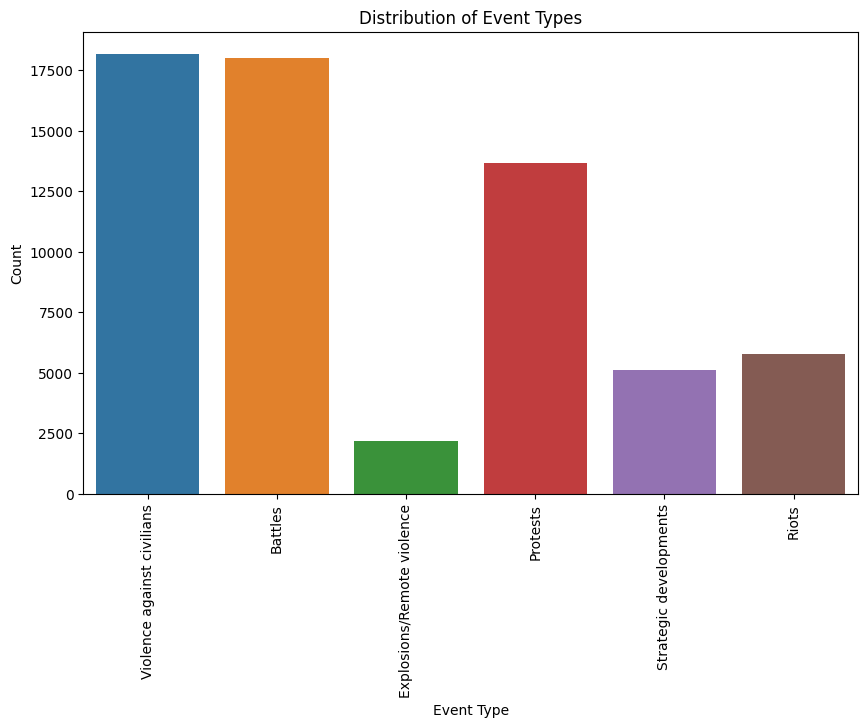

In [15]:
# Visualize event_type using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_type')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

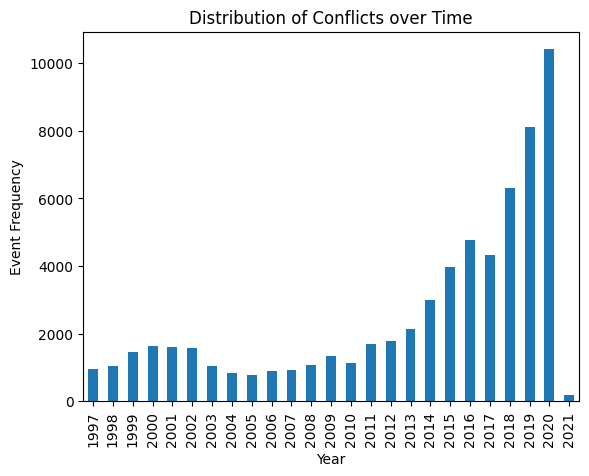

In [16]:
# frequency of events by year
events_by_year = df['year'].value_counts().sort_index()
events_by_year.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Event Frequency')
plt.title('Distribution of Conflicts over Time')
plt.show()

**We observed that in 2020, there were 10,413 reported events, making it the year with the highest count. This suggests that 2020 was a year that experienced a significant number of incidents. While between 2016-2019 had a significant number of reported events. It can be said that these years signify periods of heightened conflict or incidents that received substantial attention and reporting.**

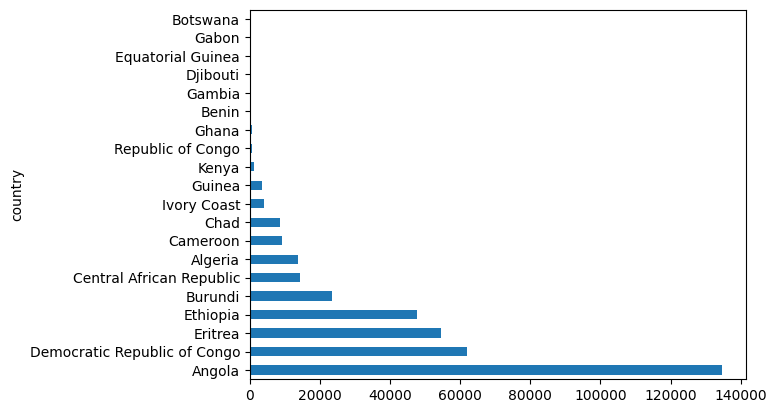

In [17]:
fatalities_by_country = df.groupby('country')['fatalities'].sum().sort_values(ascending=False)
fatalities_by_country.plot(kind='barh');

In [27]:
# Number of fatalities by Year
total_fatalities = df['fatalities'].sum()
fatalities_by_year = df.groupby('year')['fatalities'].sum().sort_values(ascending=False)

# Top 5 countries with the highest number of fatalities
fatalities_pct_by_country = (fatalities_by_country / total_fatalities) * 100
top_5_countries = fatalities_pct_by_country.head(5)

# Top 5 years with the highest number of fatalities
fatalities_pct_by_year = (fatalities_by_year / total_fatalities) * 100
top_5_years = fatalities_pct_by_year.head(5)

In [28]:
top_5_countries

country
Angola                          35.637427
Democratic Republic of Congo    16.365862
Eritrea                         14.389678
Ethiopia                        12.637742
Burundi                          6.212565
Name: fatalities, dtype: float64

In [29]:
top_5_years

year
1999    39.539023
1998    15.554022
2001     4.617972
1997     4.212316
2002     3.951046
Name: fatalities, dtype: float64

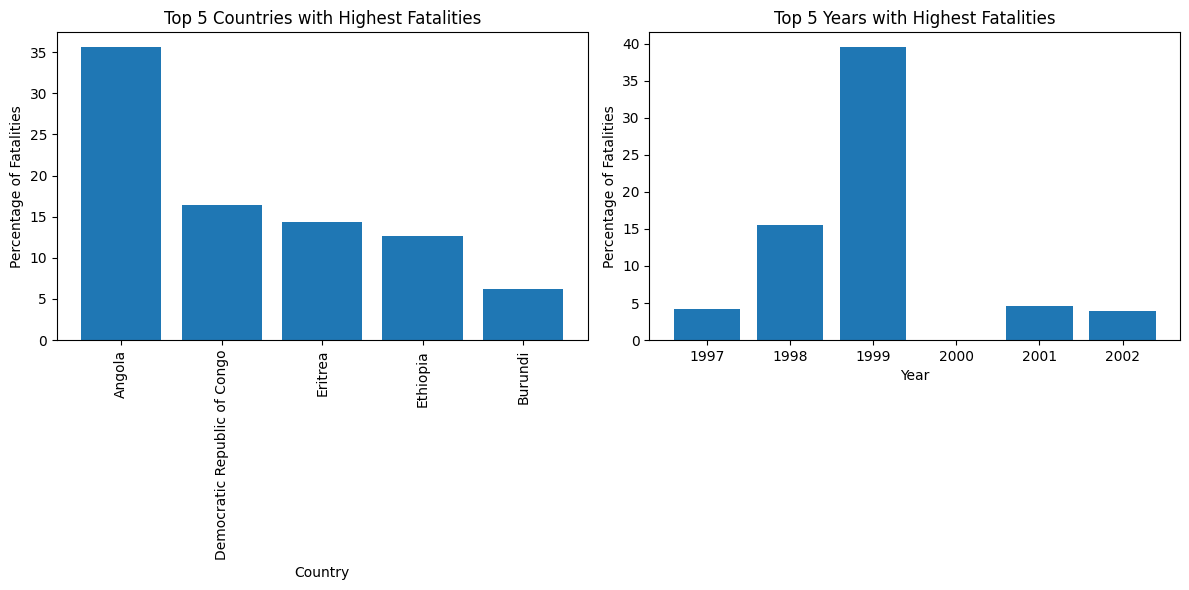

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot top 5 countries
axes[0].bar(top_5_countries.index, list(top_5_countries.values))
axes[0].set_title('Top 5 Countries with Highest Fatalities')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Percentage of Fatalities')
axes[0].set_xticks(range(len(top_5_countries)))  # Set xticks to the index values
axes[0].set_xticklabels(top_5_countries.index, rotation=90)

# Plot top 5 years
axes[1].bar(top_5_years.index, top_5_years.values)
axes[1].set_title('Top 5 Years with Highest Fatalities')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage of Fatalities')

plt.tight_layout()

# Display the plots
plt.show()

**For the analysis of fatalities, we discovered that the year 1999 had the highest number of reported deaths, accounting for approximately 39.5% of the total fatalities.**

**When examining the countries with the highest fatality rates, Angola emerged as the nation with the most reported deaths, accounting for approximately 35.6% of the total fatalities.**

**These percentages provide a clearer understanding of the distribution of fatalities both in terms of years and countries.**

In [33]:
# Create a map showing the conflicts in 1999
map_df = df[(df['year']==1999)] # Year 1999
event_locations = list(zip(map_df.latitude, map_df.longitude))

base_map = folium.Map(location=[2.318462, 19.56871], zoom_start=3)
heat_map = plugins.HeatMap(event_locations, radius=6, blur=2)
base_map.add_child(heat_map)

### Geospatial Analysis

#### Map of conflict hotspots

In [34]:
# Filter the data for locations in Africa
map_df = df[(df['latitude'] >= -35) & (df['latitude'] <= 37) & (df['longitude'] >= -26) & (df['longitude'] <= 63)]
event_locations = list(zip(map_df.latitude, map_df.longitude))
# Create a map centered on Africa
map = folium.Map(location=[8.7832, 34.5085], zoom_start=3)

# Create a heatmap layer using the filtered data
heatmap_layer = plugins.HeatMap(data=map_df[['latitude', 'longitude']], radius=6, blur=2)

# Add the heatmap layer to the map
heatmap_layer.add_to(map)

# Display the map
map

In [35]:
# Save the map as an HTML file
map.save('africa_heatmap.html')

**To visualize the concentration of conflicts, we created a heatmap using the latitude and longitude coordinates provided in the dataset. The heatmap reveals the areas with the highest density of conflicts, highlighting the regions that require immediate attention and intervention. This visual representation helps policymakers and organizations identify the hotspots and allocate resources effectively.**

### Distribution of Event Types by Region

<Figure size 1000x600 with 0 Axes>

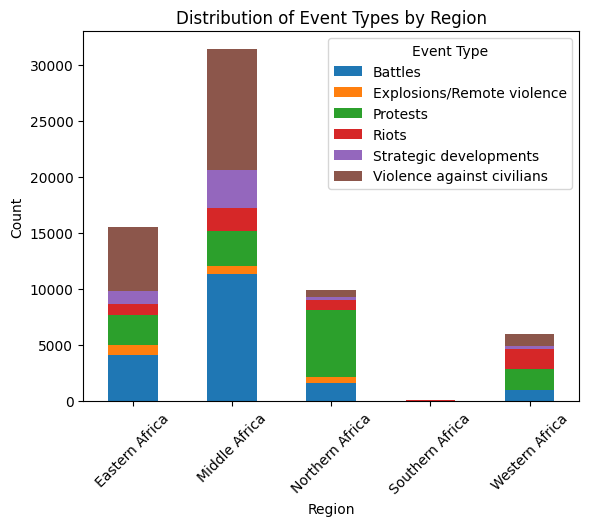

In [37]:
# Region vs. Event_type (Stacked bar chart)
region_event_type = df.groupby(['region', 'event_type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
region_event_type.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Event Types by Region')
plt.legend(title='Event Type')
plt.xticks(rotation=45)
plt.show();

### Distribution of Fatalities by Region and Country

In [38]:
# Number of Fatalities by Region
fatalities_by_region = df.groupby(['region'])[['fatalities']].sum()
fatalities_by_region

,fatalities
region,
Eastern Africa,126879
Middle Africa,229232
Northern Africa,13612
Southern Africa,10
Western Africa,8420


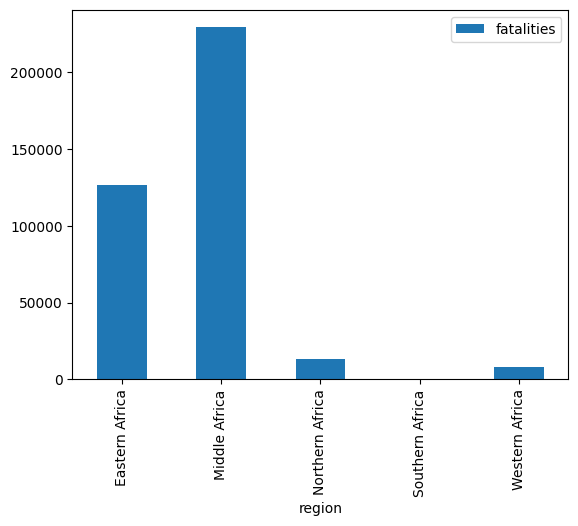

In [39]:
fatalities_by_region.plot(kind='bar');

**We uncover the number of fatalities associated with each region. Shockingly, Eastern Africa and Middle Africa have witnessed the highest number of fatalities, with a staggering total of 126,929 and 239,064 respectively. These numbers serve as a stark reminder of the human cost of these conflicts.**

**We could make the assumption that Eastern and Middle Africa, known for their hostility, are less peaceful than the Southern region of Africa.**

In [43]:
country_count = df.groupby('country')['event_type'].count().sort_values(axis=0, ascending=False)

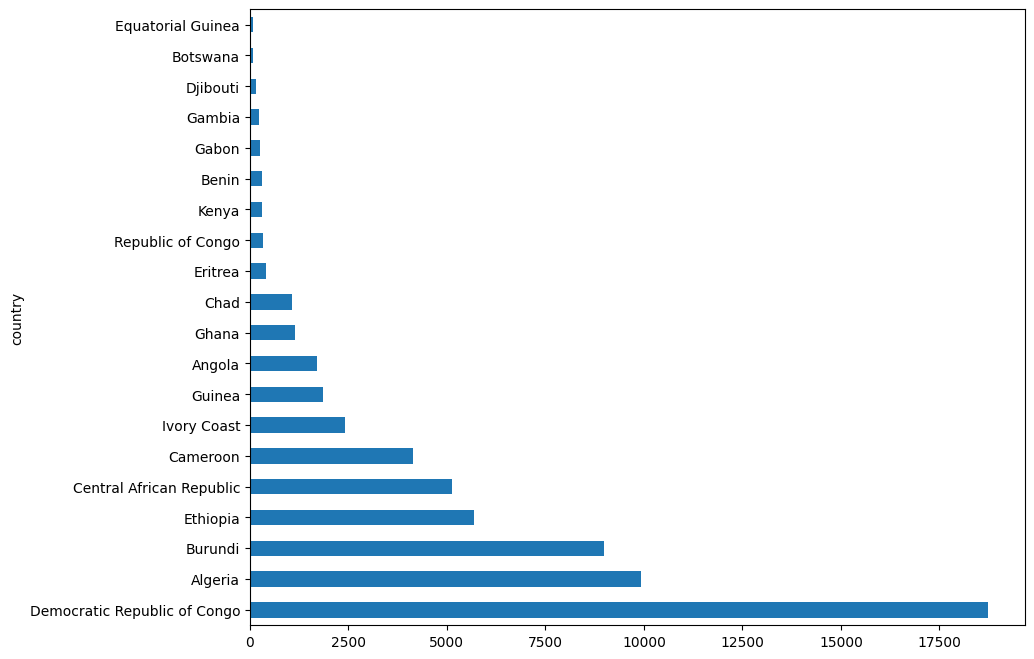

In [44]:
country_count.plot(kind='barh', figsize=(10, 8));

### Analyze event notes

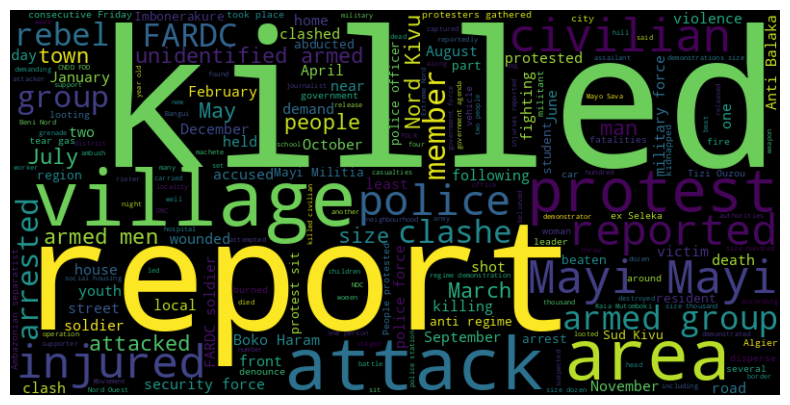

In [45]:
# Analyze event notes
from wordcloud import WordCloud
notes_text = ' '.join(df['notes'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(notes_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top Event Actors

In [47]:
# Top event actors
top_actors = pd.concat([df['actor1'], df['actor2']]).value_counts().head(10)
print(top_actors)

                                                                   14990
Civilians (Democratic Republic of Congo)                            7057
Protesters (Algeria)                                                5961
Civilians (Burundi)                                                 5444
Military Forces of the Democratic Republic of Congo (2001-2019)     3945
Civilians (Central African Republic)                                2470
Unidentified Armed Group (Democratic Republic of Congo)             2465
Military Forces of Ethiopia (1995-2018)                             2438
Unidentified Armed Group (Burundi)                                  2334
Civilians (Cameroon)                                                2175
dtype: int64


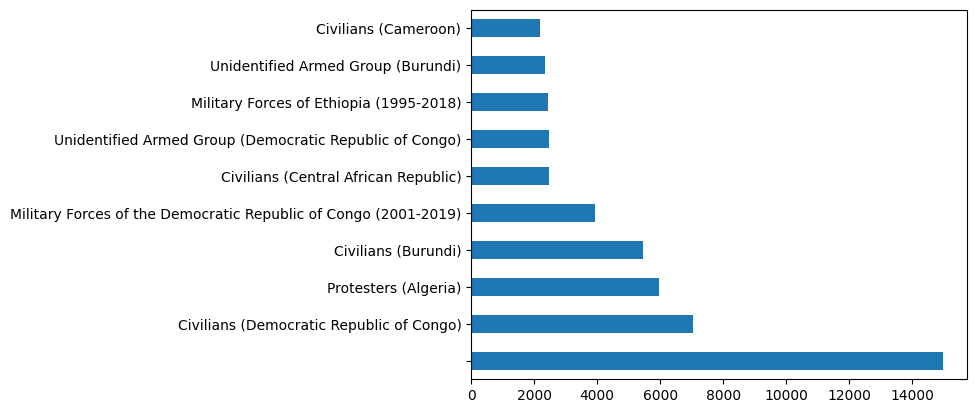

In [48]:
top_actors.plot(kind='barh');

In [49]:
# Total number of fatalities per event type recorded
fatalities_per_event_type = df.groupby(['event_type'])[['fatalities']].sum()
fatalities_per_event_type.sort_values(by=['fatalities'], axis=0, ascending=False)

,fatalities
event_type,
Battles,271912
Violence against civilians,86599
Explosions/Remote violence,13745
Riots,4342
Protests,1530
Strategic developments,25


<Axes: xlabel='event_type'>

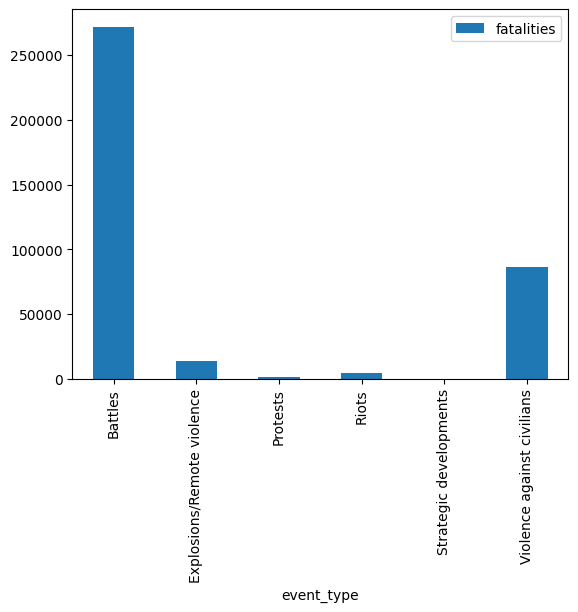

In [50]:
fatalities_per_event_type.plot(kind='bar')

In [51]:
# Exploring the total number of fatalities recorded per sub event type throught the dataset
fatalities_by_event = df.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum()
fatalities_by_event

fatalities
event_type                 sub_event_type                                 
Battles                    Armed clash                              258911
                           Government regains territory               7417
                           Non-state actor overtakes territory        5584
Explosions/Remote violence Air/drone strike                           1388
                           Chemical weapon                               0
                           Grenade                                     618
                           Remote explosive/landmine/IED              3655
                           Shelling/artillery/missile attack          7181
                           Suicide bomb                                903
Protests                   Excessive force against protesters         1530
                           Peaceful protest                              0
                           Protest with intervention                     0
Riots                      Mob violence                               2295
                           Violent demonstration                      2047
Strategic developments     Abduction/forced disappearance                0
                           Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Disrupted weapons use                        21
                           Headquarters or base established              0
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
                           Other                                         4
Violence against civilians Abduction/forced disappearance                0
                           Attack                                    85031
                           Sexual violence                            1568

**It is noted that there were no fatalities recorded during peaceful protests, abductions, looting, and arrests. However, this does not imply the absence of conflicts; it simply means that no fatalities were reported during the said events.**

### Count of the source scales

The `source_scale` column specifies the scale (local, regional, national and international) of the source that reported the event (conflict)

In [52]:
# Get the top 5 source_scale values
top_5_source_scale = df['source_scale'].value_counts().head(5)

print(top_5_source_scale)

National               23277
International          12330
Other                   6629
Regional                6121
Local partner-Other     5167
Name: source_scale, dtype: int64


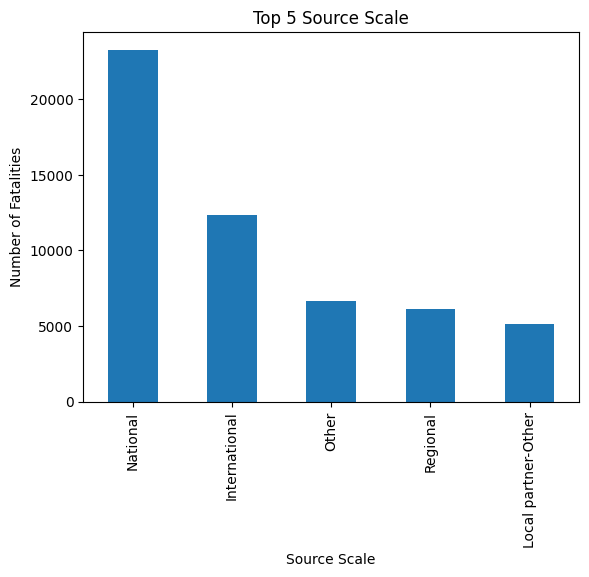

In [53]:
# Plot bar chart
top_5_source_scale.plot(kind='bar')
plt.xlabel('Source Scale')
plt.ylabel('Number of Fatalities')
plt.title('Top 5 Source Scale')
plt.xticks(rotation=90)
plt.show()

### Source scale vs Fatalities

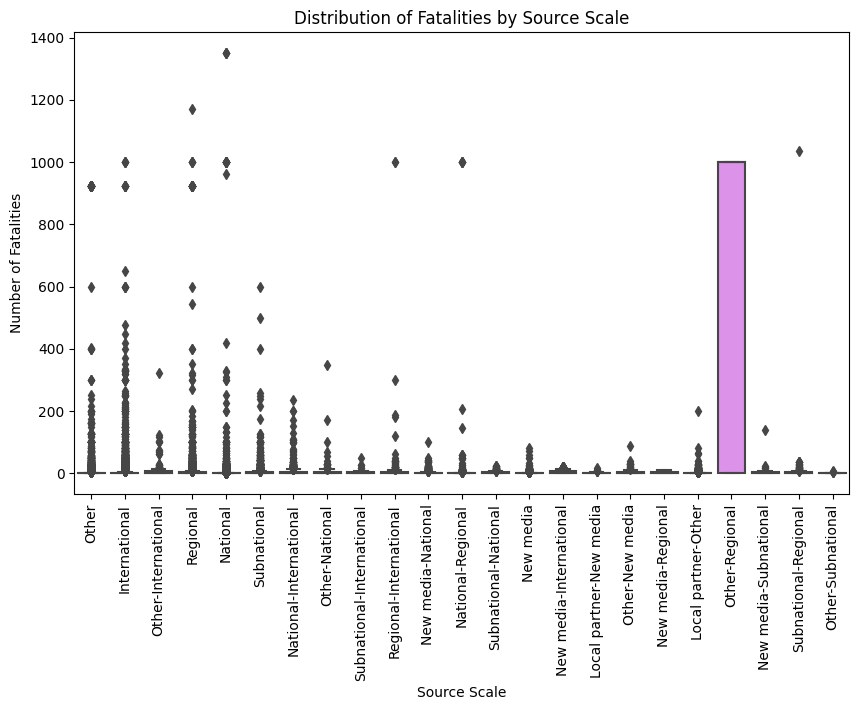

In [54]:
# Source scale vs Fatalities (Box plot)
plt.figure(figsize=(10,6))
sns.boxplot(x='source_scale', y='fatalities', data=df)
plt.xlabel('Source Scale')
plt.ylabel('Number of Fatalities')
plt.title('Distribution of Fatalities by Source Scale')
plt.xticks(rotation=90)
plt.show()

### Map plot of event_type, latitude and logitude

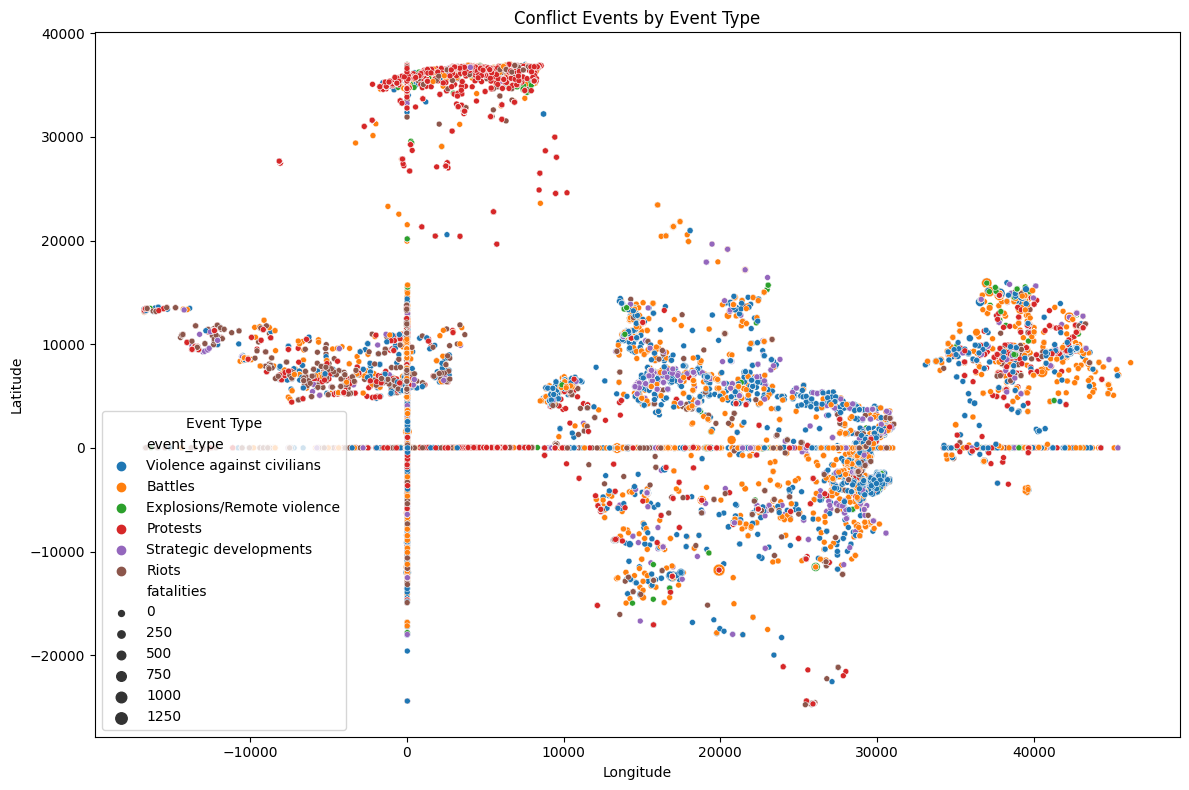

In [58]:
# event_type, latitude, and longitude (Map plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='event_type', size='fatalities', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Conflict Events by Event Type')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

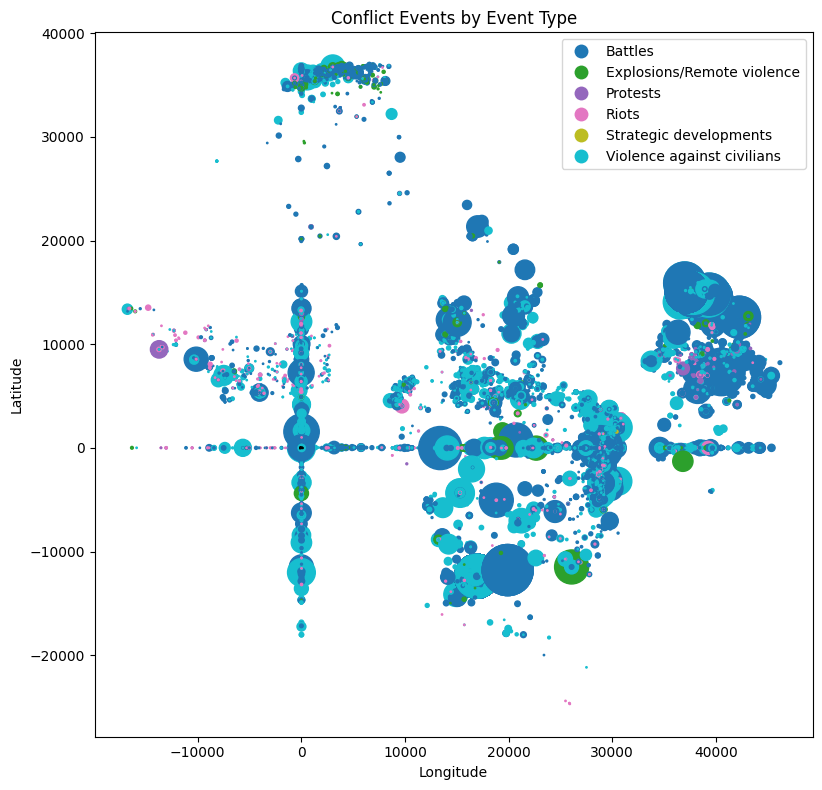

In [59]:
# Convert the dataframe to a geopandas dataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a map plot using the geopandas dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='black')
gdf.plot(ax=ax, markersize='fatalities', column='event_type', legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Conflict Events by Event Type')
plt.tight_layout()
plt.show()

### Source scale: National vs International

In [60]:
# Select only series of rows with `National`` or `International``
df_source = df[df['source_scale'].isin(['National', 'International'])]
df_source.head()

,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
141,1998-01-01,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,...,Relizane,,Relizane,35742.00,559.00,1,Pittsburgh Post-Gazette,International,1 January 1998 Pittsburgh Post-Gazette: Sevent...,78
143,1998-01-10,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,...,Bouira,,Bouira,36.38,3901.00,1,The Advertiser,International,12 January Adealide Advertiser- 26 villagers f...,26
144,1998-01-10,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,...,Tablat,,Tablat,36413.00,3.31,1,The Advertiser,International,12 January 1998 Adelaide Advertiser 20 civilia...,20
145,1998-01-10,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,...,Chehaima,,Ain es Saiada,34.90,1383.00,1,The Advertiser,International,12 Jan Adelaide Advertiser- nine members of a ...,9
147,1998-01-18,1998,1,Explosions/Remote violence,Remote explosive/landmine/IED,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,...,Sidi M'Hamed,,Algiers,36752.00,3042.00,1,The Guardian,International,21 January 1998 The Guardian- a bomb destroyed...,1


### Perform time series decomposition to identify patterns or trends

In [61]:
# Perform time series decomposition to identify patterns or trends
ts = df['year'].value_counts().sort_index()
period = 12 # Specify the period length
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

# Perform time series decomposition
decomposition = seasonal_decompose(ts, model='additive', period=period)

# Access the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

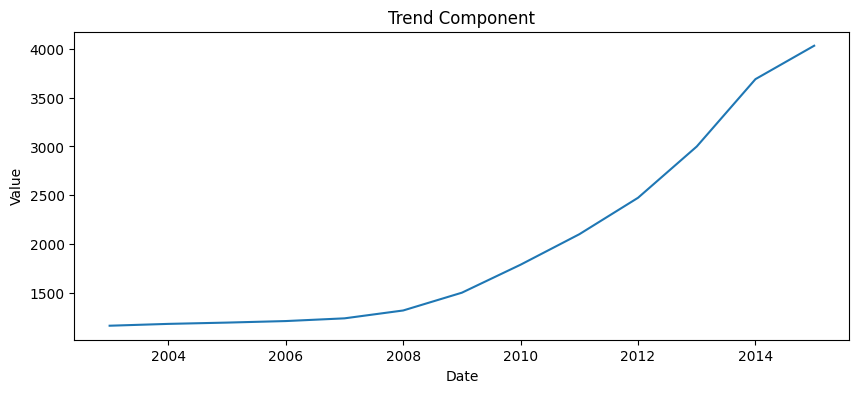

In [62]:
# Plot the trend component
plt.figure(figsize=(10, 4))
plt.plot(trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

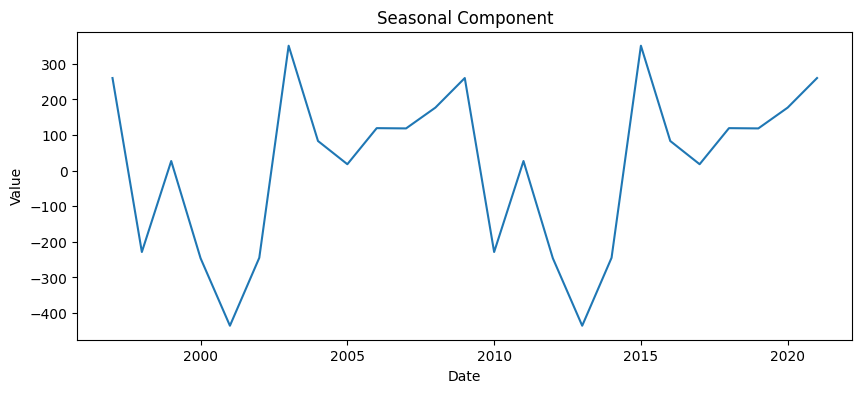

In [63]:
# Plot the seasonal component
plt.figure(figsize=(10, 4))
plt.plot(seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

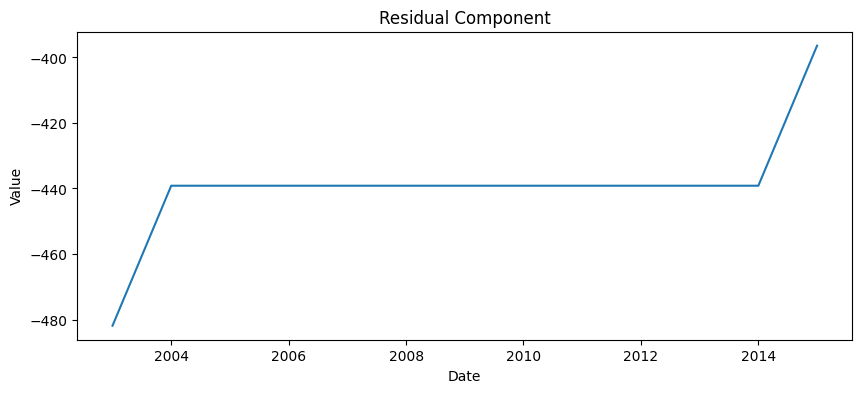

In [64]:
# Plot the residual component
plt.figure(figsize=(10, 4))
plt.plot(residual)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()